## Code used for Cumberpatch et al (2020)
### 'Evolution of a mixed siliciclastic-carbonate deep-marine system on an unstable margin: the Cretaceous of the Eastern Greater Caucasus, Azerbaijan'

### Import packages

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors
import pandas as pd
from itertools import cycle, islice
import matplotlib as mpl
from scipy import stats

import seaborn as sns

%matplotlib inline

### Load data

In [8]:
os.chdir("/Users/euansoutter/Desktop/Python/Field/azerbaijan_2020/Data/") # Sets working directory
pd.set_option('display.max_columns', 500) # Displays all columns
df = pd.read_csv("az_beds_mm.csv") # Loads data from working directory and assigns name 'df'
dfa = pd.read_csv("az_beds.csv")
dfcg = pd.read_csv('az_cg.csv')
dfloc = pd.read_csv('az_beds_loc.csv')
dfage = pd.read_csv('az_age.csv') 

### Plot bed thickness, grain size and facies data

/opt/anaconda3/envs/general/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


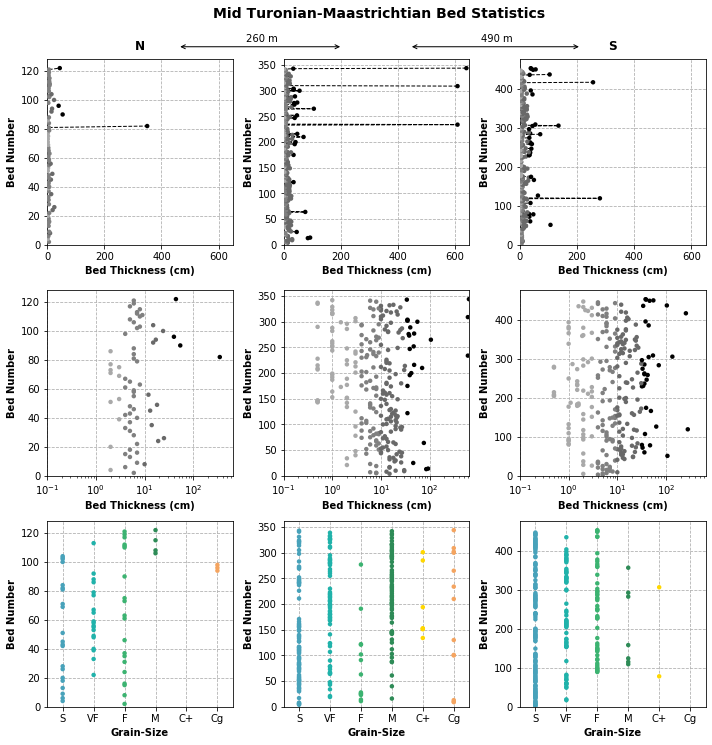

In [9]:
fig, axes = plt.subplots(ncols=3,nrows=3,figsize=(10,10))

colors = ['#48a2ba','lightseagreen','mediumseagreen','seagreen',"gold","sandybrown"]
cmap = mpl.colors.ListedColormap(colors)
cmap.set_under("grey")
cmap.set_over('indianred')
norm = mpl.colors.LogNorm(vmin=1, vmax=100)

colors2 = ['darkgrey','grey','dimgrey','k']
cmap2 = mpl.colors.ListedColormap(colors2)
cmap2.set_under("darkgrey")
cmap.set_over('k')
norm2 = mpl.colors.LogNorm(vmin=1, vmax=100)

edgecolors = 'none'
linewidth=0.2
    
def graph_bed(x, y, x_label, y_label, title, ax):
        ax=ax
        ax.scatter(x, y, c=x ,s=20, cmap=cmap2, norm=norm2, zorder=12,
        edgecolors=edgecolors,linewidths=linewidth)
        ax.plot(x, y, color='k',linestyle='dashed',linewidth=1)
        ax.set_ylabel(y_label,weight='bold')
        ax.set_xlim(left=0,right=650)
        ax.set_ylim(bottom=0)
        ax.set_xlabel(x_label,weight='bold')
        ax.set_title(title,weight='bold',pad=10,loc='center')
        ax.grid(zorder=0,linestyle='dashed')
        
def graph_bed_log(x, y, x_label, y_label, title, ax):
        ax=ax
        ax.scatter(x, y, c=x ,s=20,cmap=cmap2,norm=norm2,zorder=12,
        edgecolors=edgecolors,linewidths=linewidth)
        ax.set_xscale('log')
        ax.set_ylabel(y_label,weight='bold')
        ax.set_xlim(left=0.1,right=650)
        ax.set_ylim(bottom=0)
        ax.set_xlabel(x_label,weight='bold')
        ax.set_title(title,weight='bold',pad=10,loc='center')
        ax.grid(zorder=0,linestyle='dashed')
        
def graph_gsize(x, y, x_label, y_label, title, ax):
        ax=ax
        colors = ['#48a2ba','lightseagreen','mediumseagreen','seagreen',"gold"]
        ax.scatter(x, y, c=x ,s=20,cmap=cmap,zorder=12,
        edgecolors=edgecolors,linewidths=linewidth)
        ax.set_ylabel(y_label,weight='bold')
        ax.set_xlabel(x_label,weight='bold')
        ax.set_ylim(bottom=0)
        ax.set_xlim(2.5,8.5)
        ax.set_xticks(np.arange(3,8.0001,1))
        ax.set_xticklabels(['S', 'VF', 'F', 'M', 'C+', 'Cg'])
        ax.set_xlabel(x_label,weight='bold')
        ax.set_title(title,weight='bold',pad=10)
        ax.grid(zorder=0,linestyle='dashed')
        
graph_bed(df.beds_5C, df.Bed_Number,'Bed Thickness (cm)','Bed Number','N',axes[0,0])
graph_bed(df.beds_4A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','',axes[0,1])
graph_bed(df.beds_3A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','S',axes[0,2])

graph_bed_log(df.beds_5C, df.Bed_Number,'Bed Thickness (cm)','Bed Number','',axes[1,0])
graph_bed_log(df.beds_4A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','',axes[1,1])
graph_bed_log(df.beds_3A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','',axes[1,2])

graph_gsize(df.gsize_5C, df.Bed_Number,'Grain-Size','Bed Number','', axes[2,0])
graph_gsize(df.gsize_4A, df.Bed_Number,'Grain-Size','Bed Number','', axes[2,1])
colors = ['#48a2ba','lightseagreen','mediumseagreen','seagreen',"gold"]
cmap = mpl.colors.ListedColormap(colors)
cmap.set_under("grey")
cmap.set_over("indianred")
norm = mpl.colors.LogNorm(vmin=1, vmax=100)
graph_gsize(df.gsize_3A, df.Bed_Number,'Grain-Size','Bed Number','', axes[2,2])

plt.suptitle('Mid Turonian-Maastrichtian Bed Statistics', y=1.03, x=0.531, fontsize=14, weight='bold')
plt.tight_layout()
plt.annotate('', xy=(0.250,0.937), xytext=(0.480,0.937), xycoords='figure fraction', 
             arrowprops=dict(arrowstyle='<->', facecolor='black'))
plt.annotate('', xy=(0.575,0.937), xytext=(0.815,0.937), xycoords='figure fraction', 
             arrowprops=dict(arrowstyle='<->', facecolor='black'))
plt.annotate('260 m', xy=(0.345,0.943), xycoords='figure fraction')
plt.annotate('490 m', xy=(0.675,0.943), xycoords='figure fraction')
plt.savefig('/Users/euansoutter/Desktop/Python/Field/azerbaijan_2020/az_beds.png',
            dpi=400,bbox_inches='tight')

### Plot lithology data

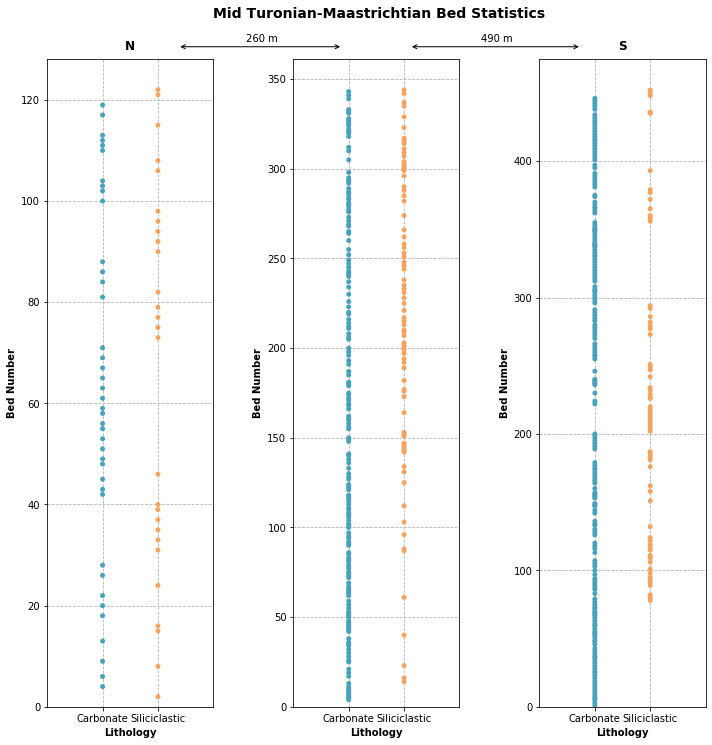

In [14]:
fig, axes = plt.subplots(ncols=3,nrows=1,figsize=(10,10))

colors = ['#48a2ba','lightseagreen','mediumseagreen','seagreen',"gold","sandybrown"]
cmap = mpl.colors.ListedColormap(colors)
cmap.set_under("grey")
cmap.set_over("indianred")
norm = mpl.colors.LogNorm(vmin=1, vmax=100)

edgecolors = 'none'
linewidth=0.2

def graph_lith(x, y, x_label, y_label, title, ax):
        ax=ax
        ax.scatter(x, y, c=x ,s=25,cmap=cmap,zorder=12,
        edgecolors=edgecolors,linewidths=linewidth)
        ax.set_xticks(np.arange(1., 2.0001, step=1))
        ax.set_ylim(bottom=0)
        ax.set_xlim(0,3)
        ax.set_xticklabels(['Carbonate', 'Siliciclastic'])
        ax.set_ylabel(y_label,weight='bold')
        ax.set_xlabel(x_label,weight='bold')
        ax.set_title(title,weight='bold',pad=10)
        ax.grid(zorder=0,linestyle='dashed')

graph_lith(df.lith_5C, df.Bed_Number,'Lithology','Bed Number','N', axes[0])
graph_lith(df.lith_4A, df.Bed_Number,'Lithology','Bed Number','', axes[1])
graph_lith(df.lith_3A, df.Bed_Number,'Lithology','Bed Number','S', axes[2])

plt.suptitle('Mid Turonian-Maastrichtian Bed Statistics', y=1.03, x=0.531, fontsize=14, weight='bold')
plt.tight_layout(w_pad=4)
plt.annotate('', xy=(0.250,0.937), xytext=(0.480,0.937), xycoords='figure fraction', 
             arrowprops=dict(arrowstyle='<->', facecolor='black'))
plt.annotate('', xy=(0.575,0.937), xytext=(0.815,0.937), xycoords='figure fraction', 
             arrowprops=dict(arrowstyle='<->', facecolor='black'))
plt.annotate('260 m', xy=(0.345,0.943), xycoords='figure fraction')
plt.annotate('490 m', xy=(0.675,0.943), xycoords='figure fraction')
plt.savefig('/Users/euansoutter/Desktop/Python/Field/azerbaijan_2020/az_lith_stats.png',
            dpi=400,bbox_inches='tight')

### Plot lithology vs thickness and grain size trends

In [5]:
df5C_cal = df[df['lith_5C'] == 1]
df5C_sil = df[df['lith_5C'] == 2]

df4A_cal = df[df['lith_4A'] == 1]
df4A_sil = df[df['lith_4A'] == 2]

df3A_cal = df[df['lith_3A'] == 1]
df3A_sil = df[df['lith_3A'] == 2]

df11A_cal = df[df['lith_11A'] == 1]
df11A_sil = df[df['lith_11A'] == 2]

df12A_cal = df[df['lith_12A'] == 1]
df12A_sil = df[df['lith_12A'] == 2]

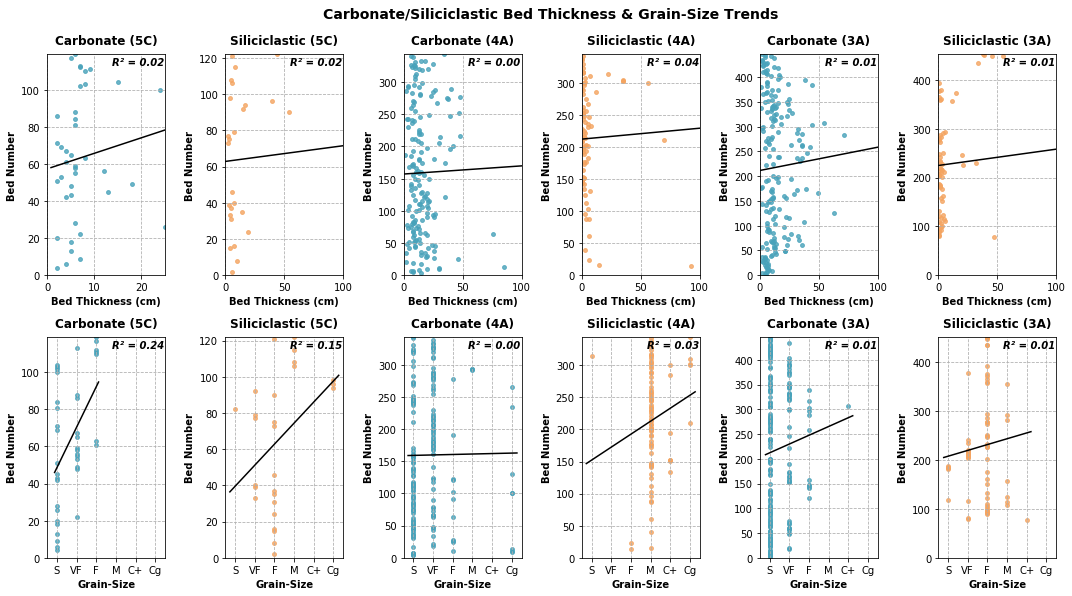

In [6]:
fig, axes = plt.subplots(ncols=6,nrows=2,figsize=(15,8))

# def r2(x, y):
#     z = stats.pearsonr(x, y)[0] ** 2
#     z = '%.2f' % z
#     return z

from sklearn.metrics import r2_score

def r2(x, y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    r2 = r2_score(y, p(x))
    r2 = '%.2f' % r2
    return r2

def sns_reg(x, y, x_label, y_label, color, title, ax):
        ax=ax
        sns.regplot(x,y,color=color, ci=None, line_kws={'color':'k', 'lw':1.5}, ax=ax, scatter_kws={'s':15}) 
#         ax.plot(x, y,color='k',linestyle='dashed',linewidth=1,zorder=0)
        ax.set_ylabel(y_label,weight='bold')
#       ax.set_xscale('log')
        if x.max() > 100:
            right = 100
        else:
            right = x.max()
        ax.set_xlim(left=0,right=right)
        ax.set_ylim(bottom=0,top=y.max())
        ax.set_xlabel(x_label,weight='bold')
        ax.set_title(title,weight='bold',pad=10,loc='center')
        ax.grid(zorder=0,linestyle='dashed')
        z = r2(x,y)
        ax.annotate(f'R\N{SUPERSCRIPT TWO} = {z}',(0.55,0.95),xycoords='axes fraction',fontsize=10,
                    fontweight='bold',style='italic',color='k')

sns_reg(df5C_cal.beds_5C, df5C_cal.Bed_Number,'Bed Thickness (cm)','Bed Number','#48a2ba','Carbonate (5C)',axes[0,0])
sns_reg(df5C_sil.beds_5C, df5C_sil.Bed_Number,'Bed Thickness (cm)','Bed Number','sandybrown','Siliciclastic (5C)',axes[0,1])

sns_reg(df4A_cal.beds_4A, df4A_cal.Bed_Number,'Bed Thickness (cm)','Bed Number',"#48a2ba",'Carbonate (4A)',axes[0,2])
sns_reg(df4A_sil.beds_4A, df4A_sil.Bed_Number,'Bed Thickness (cm)','Bed Number','sandybrown','Siliciclastic (4A)',axes[0,3])

sns_reg(df3A_cal.beds_3A, df3A_cal.Bed_Number,'Bed Thickness (cm)','Bed Number',"#48a2ba",'Carbonate (3A)',axes[0,4])
sns_reg(df3A_sil.beds_3A, df3A_sil.Bed_Number,'Bed Thickness (cm)','Bed Number','sandybrown','Siliciclastic (3A)',axes[0,5])

def sns_reg_g(x, y, x_label, y_label, color, title, ax1):
        ax=ax1
        sns.regplot(x,y,color=color, ci=None, line_kws={'color':'k', 'lw':1.5}, ax=ax, scatter_kws={'s':15}) 
#         ax.plot(x, y, color='k',linestyle='dashed',linewidth=1,zorder=0)
        ax.set_ylabel(y_label,weight='bold')
        ax.set_xlim(2.5,8.5)
        ax.set_xticks(np.arange(3,8.0001,1))
        ax.set_xticklabels(['S', 'VF', 'F', 'M', 'C+', 'Cg'])
        ax.set_ylim(bottom=0,top=y.max())
        ax.set_xlabel(x_label,weight='bold')
        ax.set_title(title,weight='bold',pad=10,loc='center')
        ax.grid(zorder=0,linestyle='dashed')
        z = r2(x,y)
        ax.annotate(f'R\N{SUPERSCRIPT TWO} = {z}',(0.55,0.95),xycoords='axes fraction',fontsize=10,
                    fontweight='bold',style='italic',color='k')
        
sns_reg_g(df5C_cal.gsize_5C, df5C_cal.Bed_Number,'Grain-Size','Bed Number',"#48a2ba",'Carbonate (5C)',axes[1,0])
sns_reg_g(df5C_sil.gsize_5C, df5C_sil.Bed_Number,'Grain-Size','Bed Number','sandybrown','Siliciclastic (5C)',axes[1,1])

sns_reg_g(df4A_cal.gsize_4A, df4A_cal.Bed_Number,'Grain-Size','Bed Number',"#48a2ba",'Carbonate (4A)',axes[1,2])
sns_reg_g(df4A_sil.gsize_4A, df4A_sil.Bed_Number,'Grain-Size','Bed Number','sandybrown','Siliciclastic (4A)',axes[1,3])

sns_reg_g(df3A_cal.gsize_3A, df3A_cal.Bed_Number,'Grain-Size','Bed Number',"#48a2ba",'Carbonate (3A)',axes[1,4])
sns_reg_g(df3A_sil.gsize_3A, df3A_sil.Bed_Number,'Grain-Size','Bed Number','sandybrown','Siliciclastic (3A)',axes[1,5])

plt.suptitle('Carbonate/Siliciclastic Bed Thickness & Grain-Size Trends', y=1.03, x=0.513, fontsize=14, weight='bold')
plt.tight_layout()
# plt.savefig('/Users/euan-soutter/Desktop/Python/Field/azerbaijan_2020/az_cs_stats_2.png', dpi=400,bbox_inches='tight')


### Calculate lithology vs thickness and grain size relationships

In [7]:
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

# calculate polynomial r2
# print(polyfit(df5C_cal.beds_5C, df5C_cal.Bed_Number, 3))
# print(polyfit(df5C_sil.gsize_5C, df5C_sil.Bed_Number, 3))
# print(polyfit(df4A_cal.gsize_4A, df4A_cal.Bed_Number, 3))
# print(polyfit(df4A_sil.gsize_4A, df4A_sil.Bed_Number, 3))
# print(polyfit(df3A_cal.gsize_3A, df3A_cal.Bed_Number, 3))
# print(polyfit(df3A_sil.gsize_3A, df3A_sil.Bed_Number, 3))

# calculate polynomial r2
print(polyfit(df5C_cal.Bed_Number, df5C_cal.beds_5C, 3))
print(polyfit(df5C_sil.Bed_Number, df5C_sil.gsize_5C, 3))
print(polyfit(df4A_cal.Bed_Number, df4A_cal.gsize_4A, 3))
print(polyfit(df4A_sil.Bed_Number, df4A_sil.gsize_4A, 3))
print(polyfit(df3A_cal.Bed_Number, df3A_cal.gsize_3A, 3))
print(polyfit(df3A_sil.Bed_Number, df3A_sil.gsize_3A, 3))

{'polynomial': [2.213115457058951e-05, -0.0039819953705028215, 0.20849732567487259, 4.017035435222521], 'determination': 0.031722707047634094}
{'polynomial': [-5.2814370522088666e-06, 0.0012879965151756242, -0.07499027598072558, 5.690661085521455], 'determination': 0.23926153795768004}
{'polynomial': [-2.65942275642417e-07, 0.0001444550205605441, -0.021305124226595664, 4.477140423832531], 'determination': 0.036284030243287295}
{'polynomial': [1.6528216822755655e-07, -9.987754453019496e-05, 0.01868596703874873, 5.102035615704335], 'determination': 0.06657053957038972}
{'polynomial': [-2.5904566378413918e-08, 7.164870757064983e-06, 0.0017906165424855884, 3.1203827176790218], 'determination': 0.06631546385249229}
{'polynomial': [-2.3842551594645755e-07, 0.00020109302691442144, -0.04956405979670428, 8.15014999537143], 'determination': 0.16234551936930833}


In [8]:
dfcg = dfcg.replace(3.0, 2.0)

### Plot clast count pie charts

Text(0.49, 0.69, 'Conglomerate Clast Distributions')

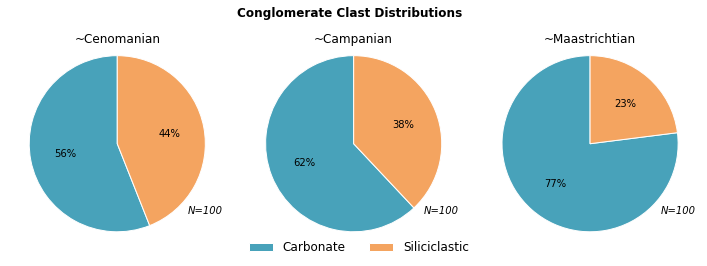

In [9]:
fig,axs=plt.subplots(ncols=3,figsize=(10,10))

c = ["#48a2ba",'sandybrown']
labels=['Carbonate', 'Siliciclastic']
radius=1

ax=axs[0]
dfupper = dfcg['upper'].value_counts()
ax.pie(dfupper,startangle=90,colors=c,labels=None,autopct='%1.f%%',
       wedgeprops={"edgecolor":"w",'linewidth': 1, 'antialiased': True},
       radius=radius)
ax.set_title('~Cenomanian',x=0.5,y=0.93)
ax.text(x=0.8,y=-0.8,s='N=100',style='italic')

ax=axs[1]
dfmiddle = dfcg['middle'].value_counts()
ax.pie(dfmiddle,startangle=90,colors=c,labels=None,autopct='%1.f%%',
       wedgeprops={"edgecolor":"w",'linewidth': 1, 'antialiased': True},
       radius=radius)
ax.set_title('~Campanian',x=0.5,y=0.93)
ax.text(x=0.8,y=-0.8,s='N=100',style='italic')

ax=axs[2]
dflower = dfcg['lower'].value_counts()
ax.pie(dflower,startangle=90,colors=c,labels=None,autopct='%1.f%%',
       wedgeprops={"edgecolor":"w",'linewidth': 1, 'antialiased': True},
       radius=radius)
ax.set_title('~Maastrichtian',x=0.5,y=0.93)
ax.text(x=0.8,y=-0.8,s='N=100',style='italic')

    
plt.tight_layout()
plt.legend(labels,ncol=3,loc=8,bbox_to_anchor=[-0.55,-0.05],
           frameon=False,fontsize=12)
plt.suptitle('Conglomerate Clast Distributions',
             x=0.49,y=0.69,fontweight='bold')

# fig.savefig('/Users/euan-soutter/Desktop/Python/Field/azerbaijan_2020/az_cg_pie_2.png',
#             dpi=400, bbox_inches='tight')

### Plot facies proportions within facies associations 

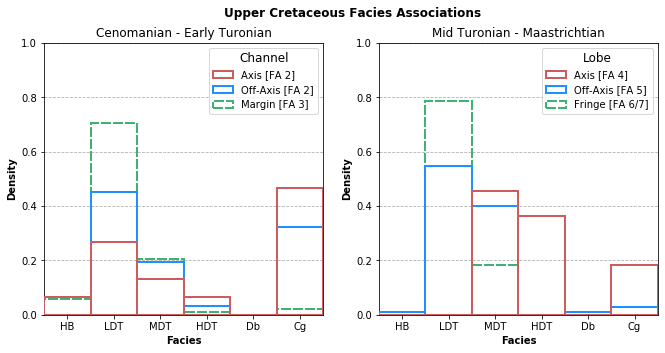

In [15]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick

fig,axs = plt.subplots(ncols=2,figsize=(11,5))

def plot_facies(log1,log2,log3,log1label,log2label,log3label,title,legtitle,ax):
        ax=ax
        ax.hist(log1, bins=np.arange(1.5,8.5,1),fill=False, 
         edgecolor = "indianred",linewidth=2,
        density=True,label=log1label,zorder=4)
        ax.hist(log2, bins=np.arange(1.5,8.5,1),fill=False,
         edgecolor = "dodgerblue",linewidth=2,
        density=True,label=log2label,zorder=3)
        ax.hist(log3, bins=np.arange(1.5,8.5,1),fill=False,
         edgecolor = "mediumseagreen",linewidth=2,linestyle=(0,(5,1)),
        density=True,label=log3label,zorder=2)
        ax.set_xlim(1.5,7.5)
        ax.set_ylim(0,1)
#         ax.set_yticklabels(['0','20','40','60','80','100'])
        ax.set_xticklabels(['','HB', 'LDT', 'MDT', 'HDT', 'Db', 'Cg'])
        ax.set_xlabel('Facies', weight='bold')
        ax.set_ylabel('Density',weight='bold')
        ax.grid(zorder=0,linestyle='dashed',axis='y')
        ax.legend(title=legtitle,fontsize=10,title_fontsize=12)
        ax.set_title(title)
#         for axis in ['top','bottom','left','right']:
#             ax.spines[axis].set_linewidth(1)
#             ax.spines[axis].set_color("k")
#             ax.spines[axis].set_zorder(10)
            
# plot_facies(df.facies_7D,df.facies_6A,df.facies_7D,'Off-axis','Axis','','Cenomanian - Turonian',ax=axs[0])
plot_facies(df.facies_7C,df.facies_7B,df.facies_7A,'Axis [FA 2]','Off-Axis [FA 2]','Margin [FA 3]',
            'Cenomanian - Early Turonian','Channel',ax=axs[0])
plot_facies(df.facies_5A,df.facies_3A,df.facies_5C,'Axis [FA 4]','Off-Axis [FA 5]','Fringe [FA 6/7]', 
            'Mid Turonian - Maastrichtian','Lobe',ax=axs[1])

plt.suptitle('Upper Cretaceous Facies Associations', weight='bold', x=0.515,y=0.98)
plt.savefig('/Users/euansoutter/Desktop/Python/Field/azerbaijan_2020/az_facies_stats.png',
           dpi=400,bbox_inches='tight')